# Homework 4: Clustering

## Data

We will use a data set about beer for our clustering homework.

In [1]:
# beer dataset
import pandas as pd
beer = pd.read_csv('beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
# define X
X = beer.drop('name', axis=1)

**Note**

We don't need a Y as our target variable, because clustering is an unsupervised learning, 

** Standardize the data **

Standardization of a dataset is a common requirement for many machine learning estimators. sk-learn provides a convenient function "StandardScaler" for this purpose: it standardize features by removing the mean and scaling to unit variance.

In [3]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## K-means clustering

### Task 1: use the K-means algorithm to make 3 (k=3) clusters of the beer data.

Question 1.1: What do the clusters seem to be based on? Why?

In [4]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 14, 8

# I've abstracted some of what we'll be doing today into a library.
# You can take a look at this code if you want by going into `dstools/data_tools.py`
from dstools import data_tools

np.random.seed(36)

In [5]:
k_clusters = 3

# Fit and predict clusters
model = KMeans(k_clusters)
model.fit(X)
clusters = model.predict(X)

# Do some messy stuff to print a nice table of clusters
cluster_listing = {}
for cluster in range(k_clusters):
    cluster_listing['Cluster ' + str(cluster)] = [''] * 109
    where_in_cluster = np.where(clusters == cluster)[0]
    cluster_listing['Cluster ' + str(cluster)][0:len(where_in_cluster)] = beer.index[where_in_cluster]

# Print clusters
pd.DataFrame(cluster_listing).loc[0:np.max(np.bincount(clusters)) - 1,:]

,Cluster 0,Cluster 1,Cluster 2
0,0,3,2
1,1,4,8
2,5,13,9
3,6,14,11
4,7,,12
5,10,,15
6,16,,18
7,17,,19


### Task 2: Plot all data points on scatter charts. Each chart displays data on two attributes, so there will be 6 charts in total. Use different colors for clusters. Also plot cluster centers with a different symbol from beer data points. 

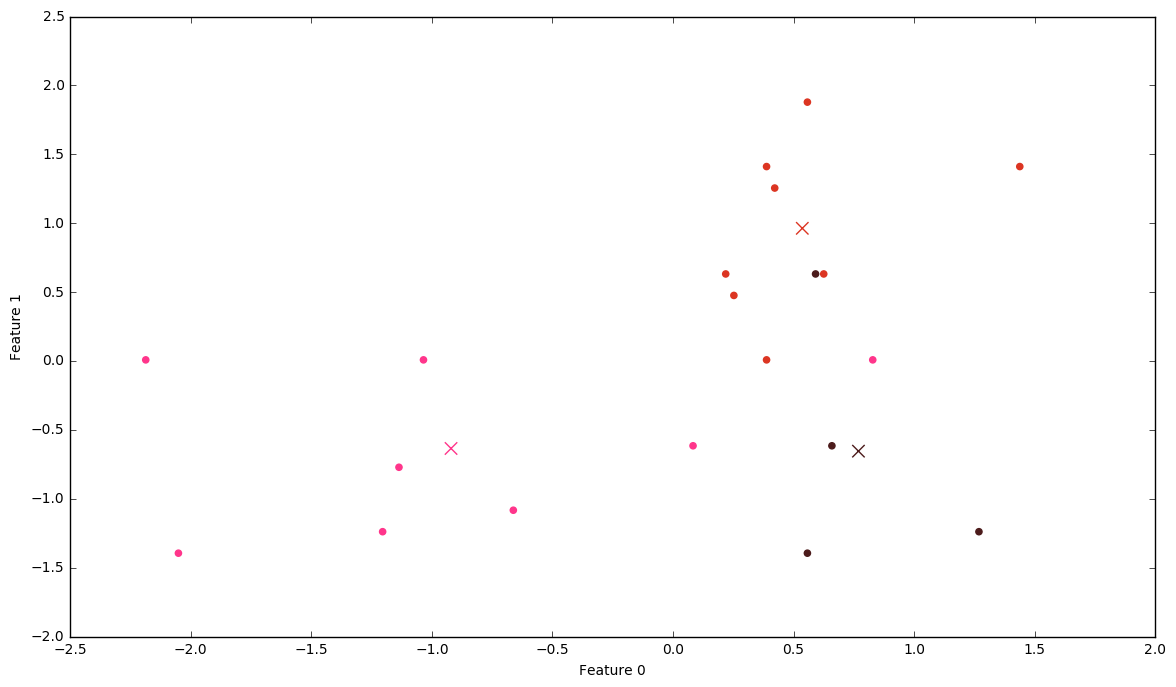

In [6]:
#define center and colorize
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
ctr=kmeans.cluster_centers_
clsts = model.predict(ctr)

#plot features
plt.scatter(X[:, 0], X[:, 1], color=data_tools.colorizer(clusters), s=20)
plt.scatter(ctr[:,0], ctr[:, 1], marker="x", color=data_tools.colorizer(clsts), s=80)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

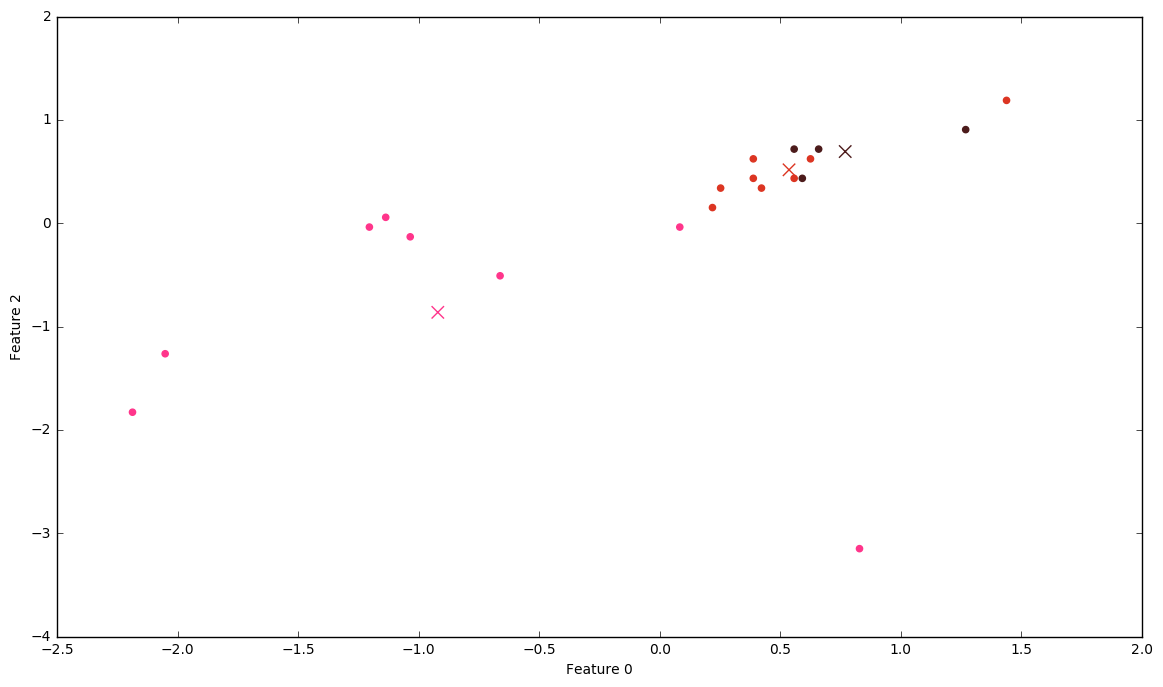

In [7]:
plt.scatter(X[:, 0], X[:, 2], color=data_tools.colorizer(clusters), s=20)
plt.scatter(ctr[:,0], ctr[:, 2], marker="x", color=data_tools.colorizer(clsts), s=80)
plt.xlabel("Feature 0")
plt.ylabel("Feature 2")
plt.show()

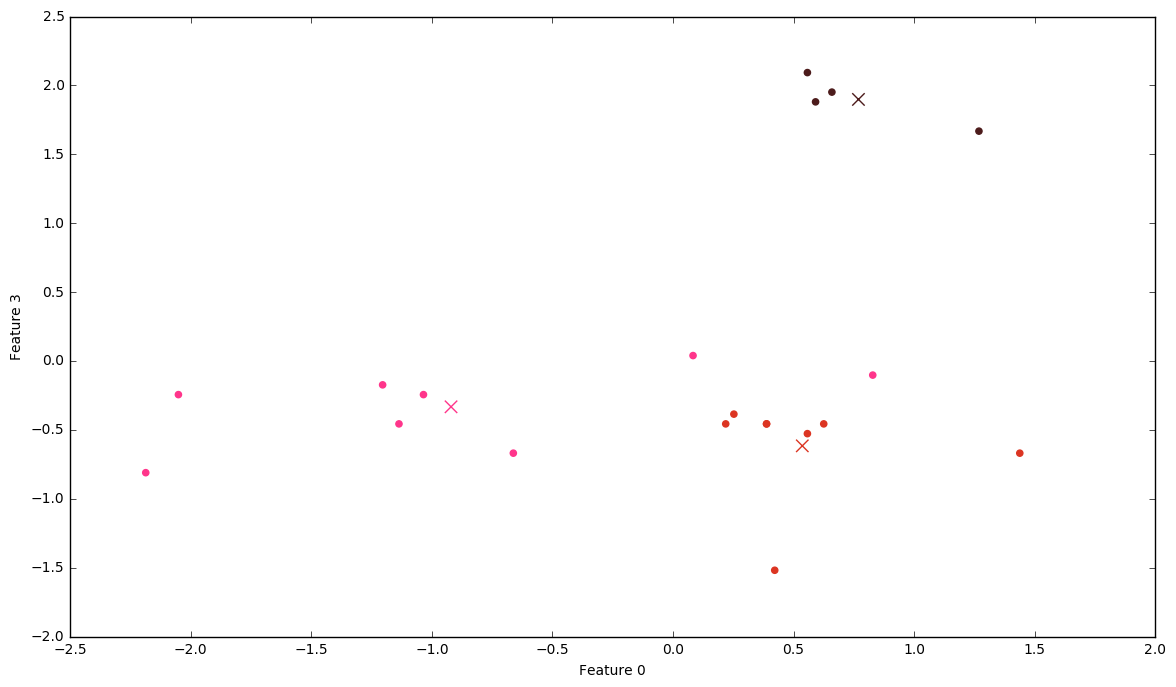

In [8]:
plt.scatter(X[:, 0], X[:, 3], color=data_tools.colorizer(clusters), s=20)
plt.scatter(ctr[:,0], ctr[:, 3], marker="x", color=data_tools.colorizer(clsts), s=80)
plt.xlabel("Feature 0")
plt.ylabel("Feature 3")
plt.show()

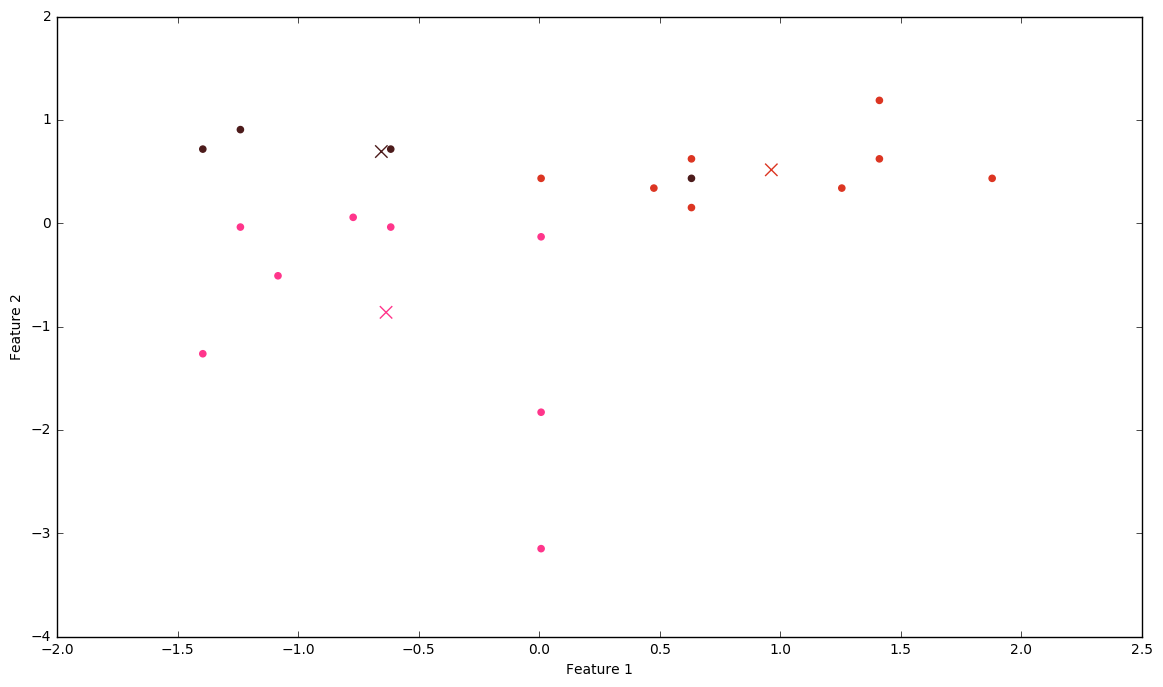

In [9]:
plt.scatter(X[:, 1], X[:, 2], color=data_tools.colorizer(clusters), s=20)
plt.scatter(ctr[:,1], ctr[:, 2], marker="x", color=data_tools.colorizer(clsts), s=80)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

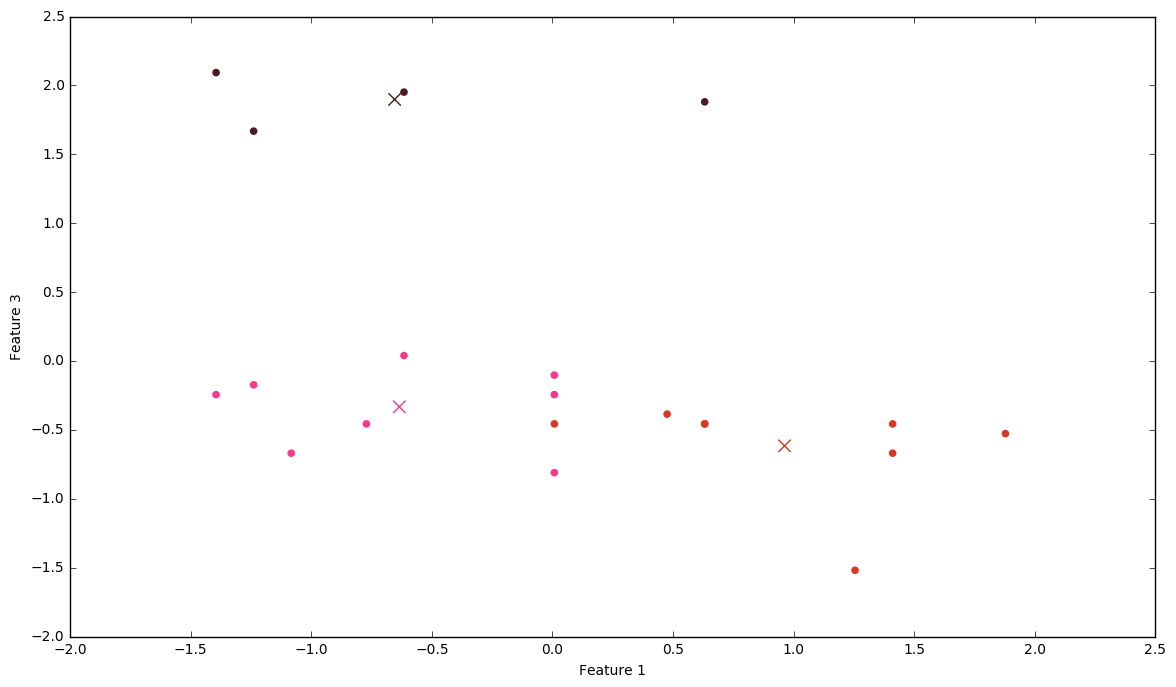

In [10]:
plt.scatter(X[:, 1], X[:, 3], color=data_tools.colorizer(clusters), s=20)
plt.scatter(ctr[:,1], ctr[:, 3], marker="x", color=data_tools.colorizer(clsts), s=80)
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
plt.show()

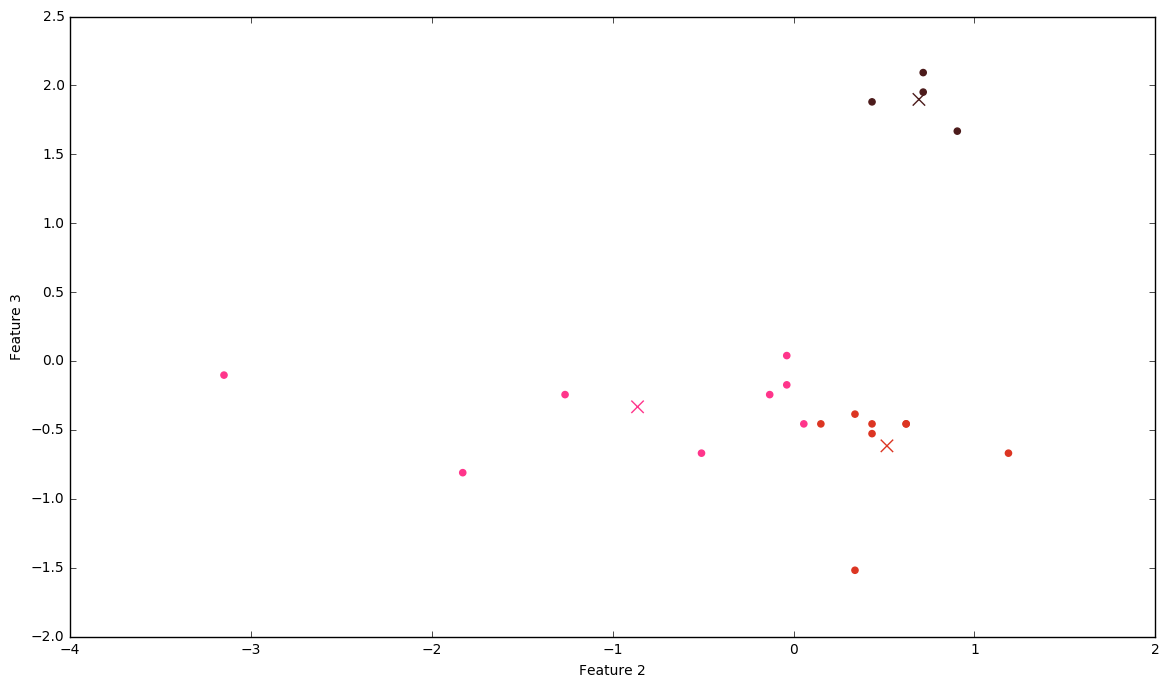

In [11]:
plt.scatter(X[:, 2], X[:, 3], color=data_tools.colorizer(clusters), s=20)
plt.scatter(ctr[:,2], ctr[:, 3], marker="x", color=data_tools.colorizer(clsts), s=80)
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

## Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

## Task 3: compute Silhouette coefficients for k-means models with k=2 to 19. Plot the results with a line chart. What k value do you think the optimal?

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
#dataset = datasets.load_iris()
x =[];y =[]
for n in range (2,20):
    kmeans_model = KMeans(n_clusters=n, random_state=1).fit(X)
    labels = kmeans_model.labels_
    m=metrics.silhouette_score(X, labels, metric='euclidean')
    x.append(n)
    y.append(m)
 
    print "when cluster=%d, Sc=%f"%(n,m)

when cluster=2, Sc=0.330715
when cluster=3, Sc=0.457774
when cluster=4, Sc=0.525464
when cluster=5, Sc=0.494066
when cluster=6, Sc=0.415390
when cluster=7, Sc=0.439076
when cluster=8, Sc=0.507629
when cluster=9, Sc=0.519898
when cluster=10, Sc=0.567205
when cluster=11, Sc=0.604959
when cluster=12, Sc=0.668134
when cluster=13, Sc=0.708062
when cluster=14, Sc=0.695104
when cluster=15, Sc=0.783978
when cluster=16, Sc=0.773329
when cluster=17, Sc=0.832725
when cluster=18, Sc=0.897954
when cluster=19, Sc=0.953572


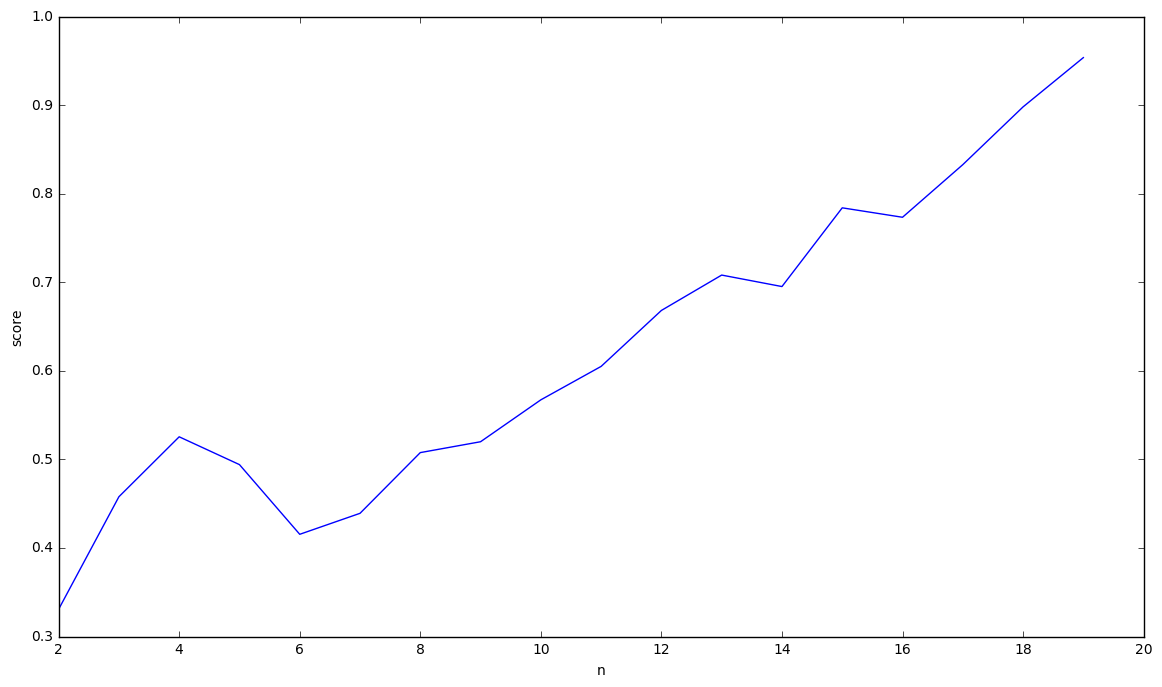

In [13]:
plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('score')